In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

import os

In [3]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 64
epochs = 100

In [5]:
base_dir = "../../Datasets/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

In [6]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

In [7]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [9]:
import json
with open('class_indices.json','w') as f:
  json.dump(train_data.class_indices, f)

from IPython.display import FileLink
FileLink(r'class_indices.json')

/home/zeph/Desktop/FarmEasy/Notebooks/class_indices.json

In [10]:
base_model = tf.keras.applications.DenseNet201(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False

74842112/74836368 [==============================] - 13s 0us/step


In [11]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(38, 
                          activation="softmax")(x)

model = keras.Model(inputs = inputs, 
                    outputs = x, 
                    name="LeafDisease_MobileNet")

In [15]:
optimizer = tf.keras.optimizers.Adam() #lr=0.05 --- Mention LR here, default - 0.01

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(), 
                       'accuracy'])

In [27]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=10,
                    steps_per_epoch=10,
                    validation_steps=5)

Epoch 1/10
10/10 [==============================] - 168s 17s/step - loss: 0.5780 - categorical_accuracy: 0.8750 - accuracy: 0.8750 - val_loss: 0.4512 - val_categorical_accuracy: 0.9031 - val_accuracy: 0.9031
Epoch 2/10
10/10 [==============================] - 187s 19s/step - loss: 0.5276 - categorical_accuracy: 0.8844 - accuracy: 0.8844 - val_loss: 0.4577 - val_categorical_accuracy: 0.9156 - val_accuracy: 0.9156
Epoch 3/10
10/10 [==============================] - 181s 19s/step - loss: 0.4802 - categorical_accuracy: 0.8969 - accuracy: 0.8969 - val_loss: 0.5031 - val_categorical_accuracy: 0.8813 - val_accuracy: 0.8813
Epoch 4/10
10/10 [==============================] - 221s 21s/step - loss: 0.5183 - categorical_accuracy: 0.8687 - accuracy: 0.8687 - val_loss: 0.3974 - val_categorical_accuracy: 0.8875 - val_accuracy: 0.8875
Epoch 5/10
10/10 [==============================] - 200s 20s/step - loss: 0.5120 - categorical_accuracy: 0.8813 - accuracy: 0.8813 - val_loss: 0.4085 - val_categorical_

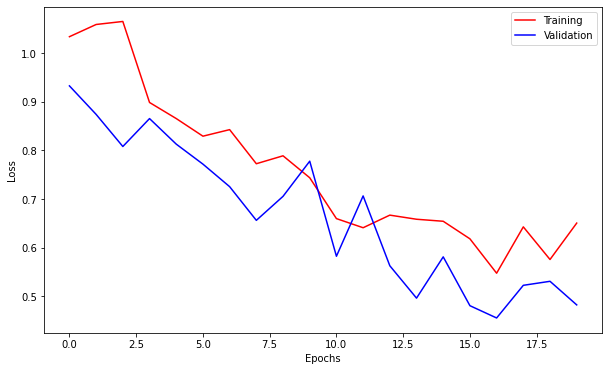

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

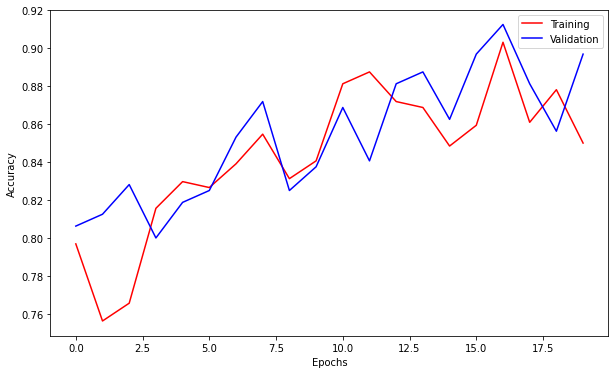

In [25]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [38]:
model.save('./../Flask/Classes/transfer_model.h5')

In [32]:
import sys

In [34]:
sys.setrecursionlimit(100000)

In [36]:
pip install dill

     |████████████████████████████████| 86 kB 470 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [37]:
import dill

In [35]:
import pickle
output = open('disease_predictor.pkl', 'wb')
pickle.dump(model,output)
output.close()

TypeError: cannot pickle 'weakref' object